# Problem-2

### You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey. 

### The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic #characteristics.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['axes.titlesize'] = 16
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

C:\Users\User\AppData\Local\Temp\ipykernel_15912\683685668.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
data = pd.read_excel(r'C:\Users\User\Downloads\Contraceptive_method_dataset.xlsx')

In [4]:
print('Number of rows:',data.shape[0],'\nNumber of columns:',data.shape[1])

Number of rows: 1473 
Number of columns: 10


In [5]:
data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [6]:
print(data.info(),'\n')
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB
None 

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wi

In [7]:
data.isnull().sum()[data.isnull().sum()>0]

Wife_age               71
No_of_children_born    21
dtype: int64

In [8]:
# Removing the spaces in column name

In [9]:
data.rename(columns={'Wife_ education':'Wife_education','Media_exposure ':'Media_exposure'},inplace=True)

In [10]:
data['Wife_education'].value_counts()

Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_education, dtype: int64

In [11]:
data['Wife_religion'].value_counts()

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64

In [12]:
data['Media_exposure'].value_counts()

Exposed        1364
Not-Exposed     109
Name: Media_exposure, dtype: int64

In [13]:
data['Wife_Working'].value_counts()

No     1104
Yes     369
Name: Wife_Working, dtype: int64

In [14]:
data['Media_exposure'].value_counts()

Exposed        1364
Not-Exposed     109
Name: Media_exposure, dtype: int64

In [15]:
data['Standard_of_living_index'].value_counts()

Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64

In [16]:
data['Husband_education'].value_counts()

Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64

In [17]:
data['Husband_Occupation'].value_counts()

3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64

In [18]:
data['Contraceptive_method_used'].value_counts()

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64

In [19]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data['Wife_age'].fillna(data['Wife_age'].median(),inplace=True)

In [21]:
data['No_of_children_born'].fillna(data['No_of_children_born'].median(),inplace=True)

In [22]:
data['Wife_age'] = data['Wife_age'].round().astype('int64')

In [23]:
data['No_of_children_born'] = data['No_of_children_born'].round().astype('int64')

In [24]:
num = data.select_dtypes(['float64','int64'])
cat = data.select_dtypes(['object']) 

In [25]:
import scipy.stats as stats

In [26]:
def percent_outlier(_series):
    counter = 0
    lb = _series.quantile(0.25)-(1.5*(stats.iqr(_series)))
    ub = _series.quantile(0.75)+(1.5*(stats.iqr(_series)))
    for val in _series:
        if (val>ub) or (val<lb): 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

In [27]:
def outlier_percentage_df(data, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(data[x]),4)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [28]:
outlier_percentage_df(data,num)

,% OUTLIERS
No_of_children_born,3.055
Wife_age,0.000
Husband_Occupation,0.000


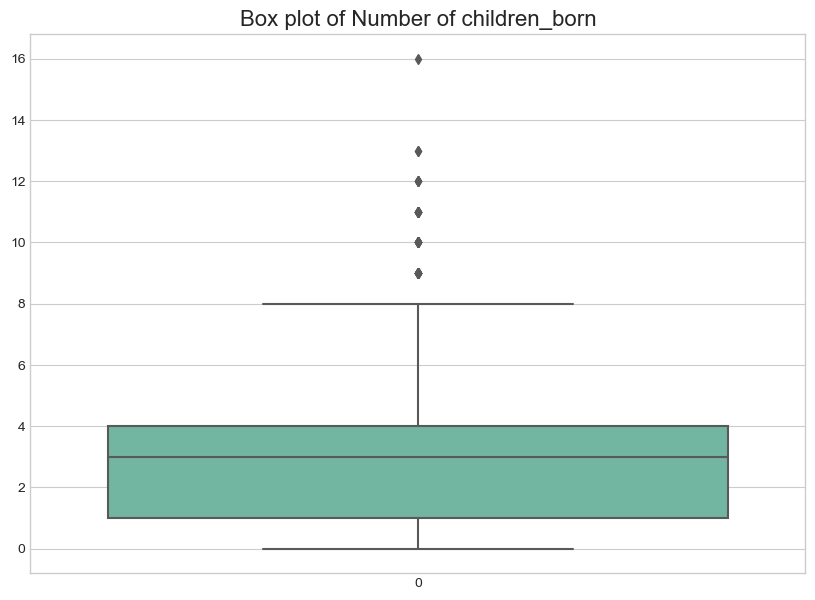

In [29]:
sns.boxplot(data['No_of_children_born'])
plt.title('Box plot of Number of children_born')
plt.show()

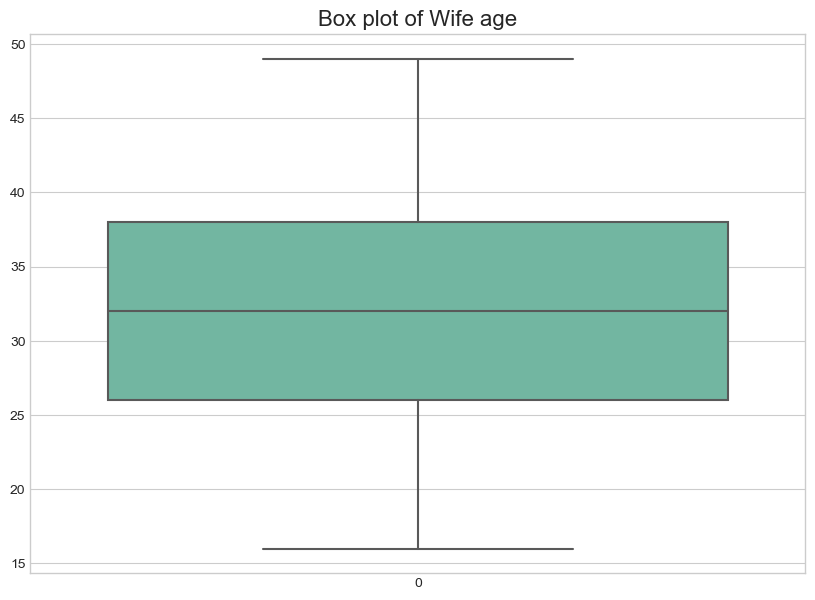

In [30]:
sns.boxplot(data['Wife_age'])
plt.title('Box plot of Wife age')
plt.show()

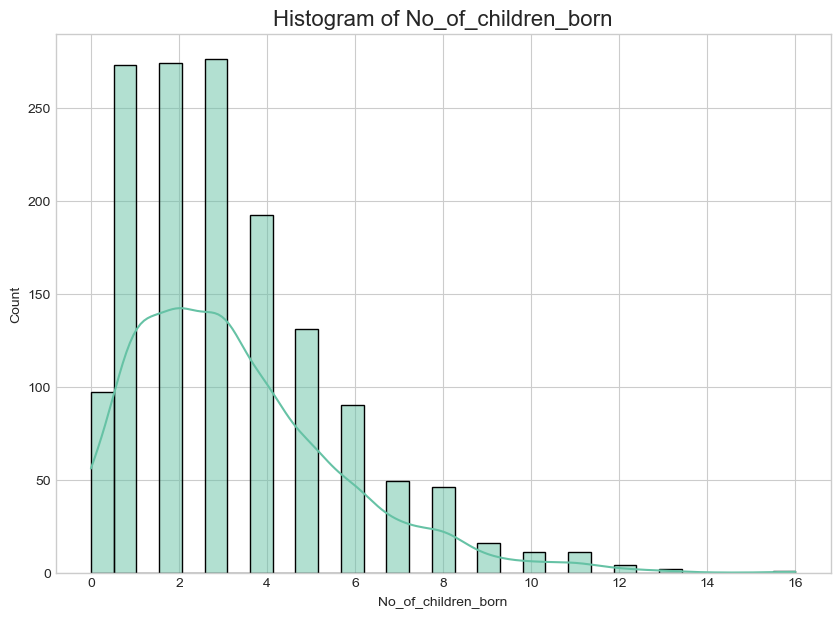

In [31]:
sns.histplot(data['No_of_children_born'],kde=True)
plt.title('Histogram of No_of_children_born')
plt.show()

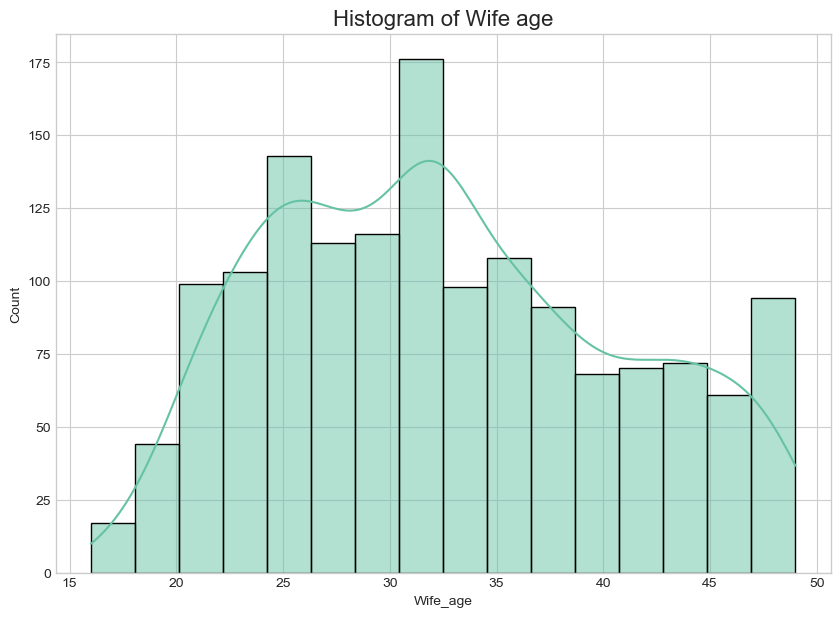

In [32]:
sns.histplot(data['Wife_age'],kde=True)
plt.title('Histogram of Wife age')
plt.show()

In [33]:
# We need to treat ouliers 

In [34]:
lb = data['No_of_children_born'].quantile(0.25)-(1.5*(stats.iqr(data['No_of_children_born'])))
ub = data['No_of_children_born'].quantile(0.25)+(1.5*(stats.iqr(data['No_of_children_born'])))

In [35]:
lb

-3.5

In [36]:
ub

5.5

In [37]:
data['No_of_children_born']=np.where(data['No_of_children_born']>ub,ub,data['No_of_children_born'])
data['No_of_children_born']=np.where(data['No_of_children_born']<lb,lb,data['No_of_children_born'])

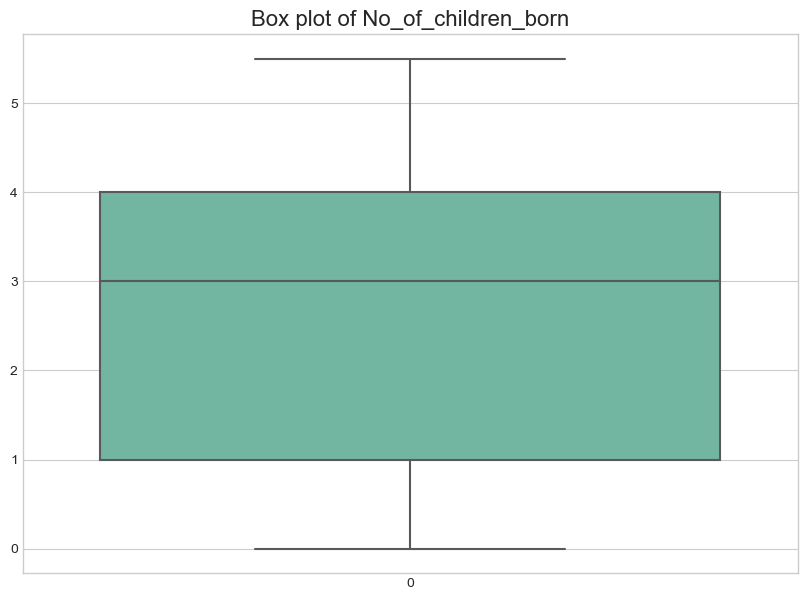

In [38]:
sns.boxplot(data['No_of_children_born'])
plt.title('Box plot of No_of_children_born')
plt.show()

In [39]:
data.duplicated().sum()

90

In [40]:
data = data.drop_duplicates()

In [41]:
data.duplicated().sum()

0

In [42]:
data.shape

(1383, 10)

In [43]:
# We have removed all the duplicated in the dataset

In [44]:
data.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

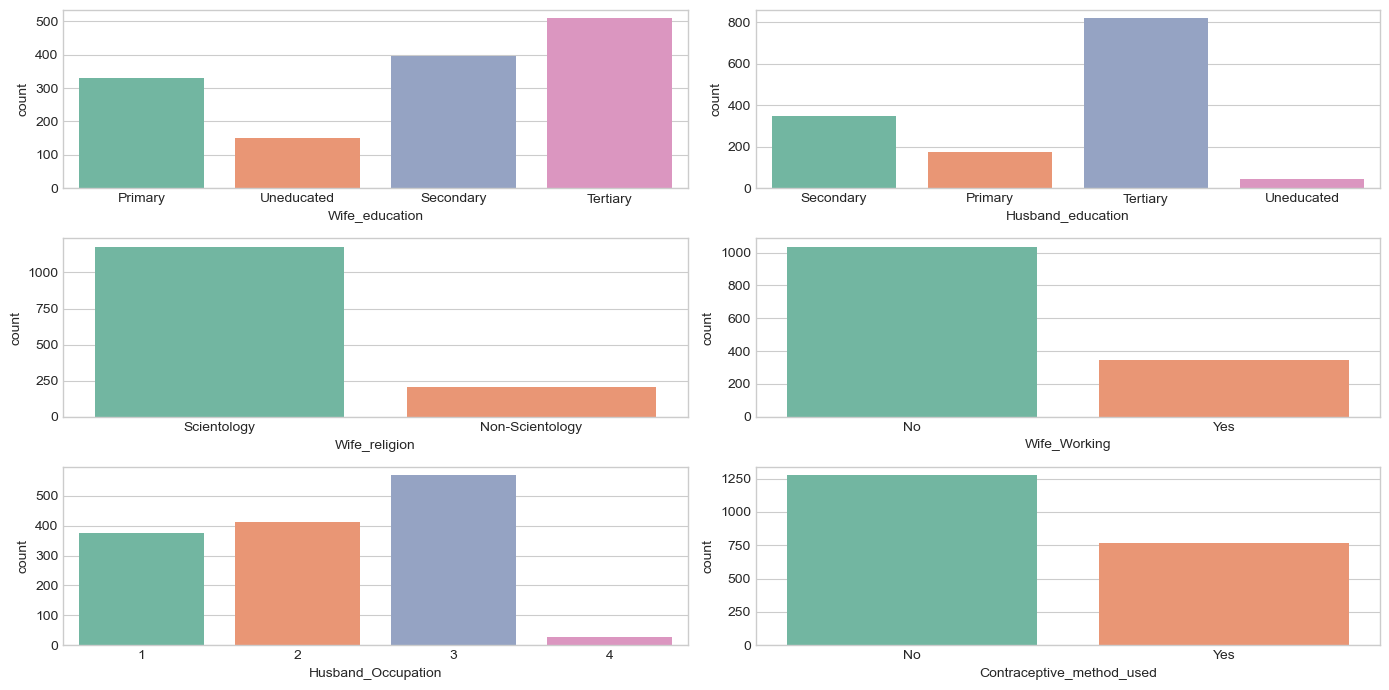

In [45]:
plt.figure(figsize=(14,7))
plt.subplot(3,2,1)
sns.countplot(data = data,x = data.columns[1])
plt.subplot(3,2,2)
sns.countplot(data = data,x = data.columns[2])
plt.subplot(3,2,3)
sns.countplot(data = data,x = data.columns[4])
plt.subplot(3,2,4)
sns.countplot(data = data,x = data.columns[5])
plt.subplot(3,2,5)
sns.countplot(data = data,x = data.columns[6])
plt.subplot(3,2,6)
sns.countplot(data = data,x = data.columns[7])
plt.tight_layout()
sns.countplot(data = data,x = data.columns[8])
plt.tight_layout()
sns.countplot(data = data,x = data.columns[9])
plt.tight_layout()

In [46]:
num

,Wife_age,No_of_children_born,Husband_Occupation
0,24,3,2
1,45,10,3
2,43,7,3
3,42,9,3
4,36,8,3
...,...,...,...
1468,33,3,2
1469,33,3,1
1470,39,3,1
1471,33,3,2


In [47]:
num[['Wife_age','No_of_children_born']]

,Wife_age,No_of_children_born
0,24,3
1,45,10
2,43,7
3,42,9
4,36,8
...,...,...
1468,33,3
1469,33,3
1470,39,3
1471,33,3


In [48]:
num[['Wife_age','No_of_children_born']].corr()

,Wife_age,No_of_children_born
Wife_age,1.000000,0.526923
No_of_children_born,0.526923,1.000000


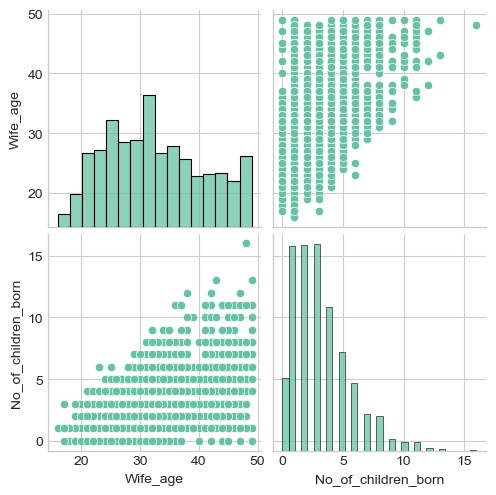

In [49]:
sns.pairplot(num[['Wife_age','No_of_children_born']])

<AxesSubplot: >

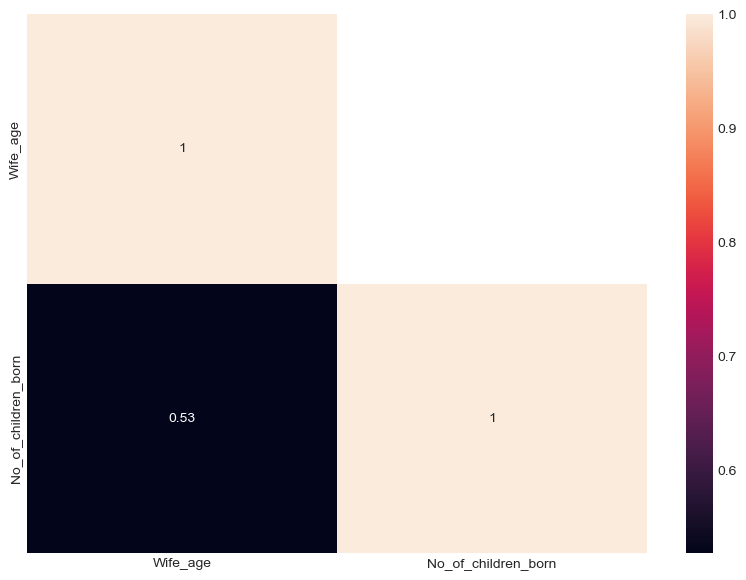

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(num[['Wife_age','No_of_children_born']].corr(),mask = np.triu(num[['Wife_age','No_of_children_born']].corr(),1),annot=True)

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and build multiple models with different predictors. 

In [51]:
# As this is a ordinal scale value we will convert the variable using categorical scale

In [52]:
data['Standard_of_living_index'].value_counts()

Very High    609
High         418
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64

In [53]:
data['Standard_of_living_index'] = np.where(data['Standard_of_living_index'] == 'Very Low','0',data['Standard_of_living_index'])
data['Standard_of_living_index'] = np.where(data['Standard_of_living_index'] == 'Low','1',data['Standard_of_living_index'])
data['Standard_of_living_index'] = np.where(data['Standard_of_living_index'] == 'High','2',data['Standard_of_living_index'])
data['Standard_of_living_index'] = np.where(data['Standard_of_living_index'] == 'Very High','3',data['Standard_of_living_index'])

In [54]:
data['Standard_of_living_index'].value_counts()

3    609
2    418
1    227
0    129
Name: Standard_of_living_index, dtype: int64

In [55]:
data['Standard_of_living_index'] = data['Standard_of_living_index'].astype('float64')

In [56]:
data = pd.get_dummies(data, columns=['Wife_religion','Wife_Working','Media_exposure','Contraceptive_method_used','Wife_education','Husband_education'], drop_first=True)


In [57]:
data.head()

,Wife_age,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure_Not-Exposed,Contraceptive_method_used_Yes,Wife_education_Secondary,Wife_education_Tertiary,Wife_education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated
0,24,3.0,2,2.0,1,0,0,0,0,0,0,1,0,0
1,45,5.5,3,3.0,1,0,0,0,0,0,1,1,0,0
2,43,5.5,3,3.0,1,0,0,0,0,0,0,1,0,0
3,42,5.5,3,2.0,1,0,0,0,1,0,0,0,0,0
4,36,5.5,3,1.0,1,0,0,0,1,0,0,1,0,0


In [58]:
data.dtypes

Wife_age                           int64
No_of_children_born              float64
Husband_Occupation                 int64
Standard_of_living_index         float64
Wife_religion_Scientology          uint8
Wife_Working_Yes                   uint8
Media_exposure_Not-Exposed         uint8
Contraceptive_method_used_Yes      uint8
Wife_education_Secondary           uint8
Wife_education_Tertiary            uint8
Wife_education_Uneducated          uint8
Husband_education_Secondary        uint8
Husband_education_Tertiary         uint8
Husband_education_Uneducated       uint8
dtype: object

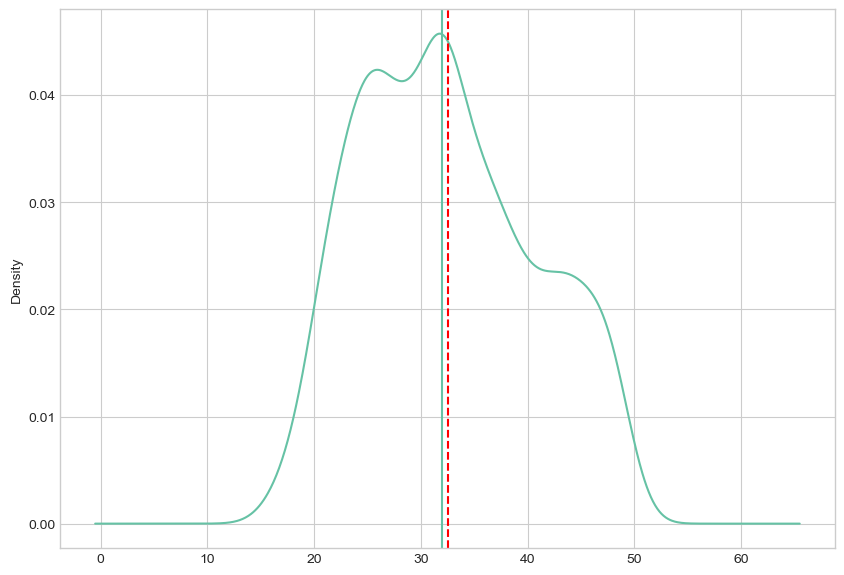

In [59]:
data['Wife_age'].plot(kind='kde')
plt.axvline(data['Wife_age'].median())
plt.axvline(data['Wife_age'].mean(),color = 'red',linestyle = 'dashed')

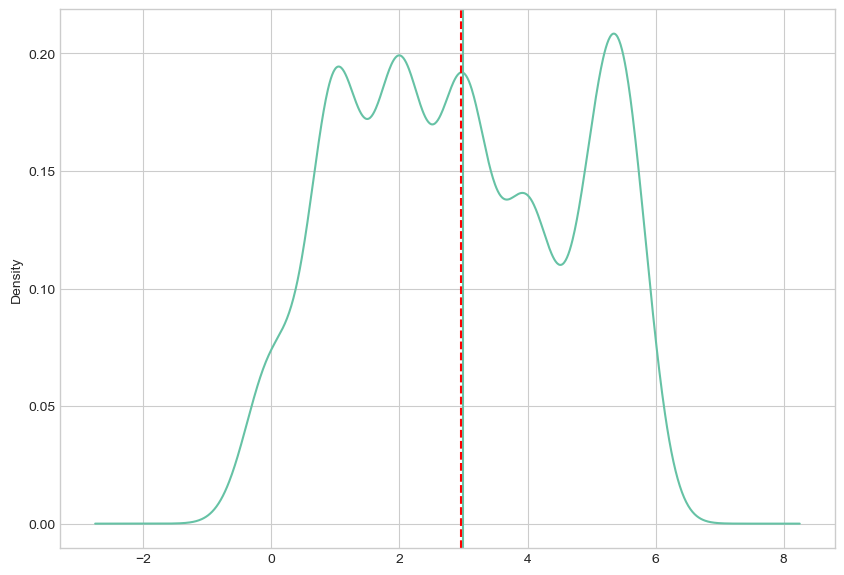

In [60]:
data['No_of_children_born'].plot(kind='kde')
plt.axvline(data['No_of_children_born'].median())
plt.axvline(data['No_of_children_born'].mean(),color = 'red',linestyle = 'dashed')

In [61]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [62]:
data.rename(columns={'Media_exposure_Not-Exposed':'Media_exposure_Not_Exposed'},inplace=True)

In [63]:
data.head()

,Wife_age,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure_Not_Exposed,Contraceptive_method_used_Yes,Wife_education_Secondary,Wife_education_Tertiary,Wife_education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated
0,24,3.0,2,2.0,1,0,0,0,0,0,0,1,0,0
1,45,5.5,3,3.0,1,0,0,0,0,0,1,1,0,0
2,43,5.5,3,3.0,1,0,0,0,0,0,0,1,0,0
3,42,5.5,3,2.0,1,0,0,0,1,0,0,0,0,0
4,36,5.5,3,1.0,1,0,0,0,1,0,0,1,0,0


In [64]:
import statsmodels.formula.api as sm

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# independent variables
X = data.drop(['Contraceptive_method_used_Yes'], axis=1)
# dependent variable
y = data['Contraceptive_method_used_Yes']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [68]:
X_train.head()

,Wife_age,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure_Not_Exposed,Wife_education_Secondary,Wife_education_Tertiary,Wife_education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated
407,47,2.0,2,3.0,1,0,0,1,0,0,1,0,0
454,36,2.0,2,3.0,1,0,0,0,1,0,0,1,0
1290,26,4.0,3,3.0,1,0,0,0,0,0,0,0,0
653,48,5.5,1,3.0,1,0,0,0,1,0,0,1,0
727,21,1.0,3,1.0,1,1,0,0,0,0,1,0,0


In [69]:
X_test.head()

,Wife_age,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure_Not_Exposed,Wife_education_Secondary,Wife_education_Tertiary,Wife_education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated
1041,24,2.0,3,1.0,1,1,0,1,0,0,1,0,0
726,24,1.0,1,2.0,1,0,0,0,1,0,0,1,0
808,29,4.0,2,3.0,1,1,0,0,0,0,0,1,0
1108,30,1.0,2,0.0,1,0,0,0,0,0,1,0,0
60,42,5.5,3,2.0,1,0,0,1,0,0,1,0,0


In [70]:
y_train.head()

407     0
454     1
1290    1
653     1
727     1
Name: Contraceptive_method_used_Yes, dtype: uint8

In [71]:
y_test.head()

1041    0
726     1
808     1
1108    0
60      0
Name: Contraceptive_method_used_Yes, dtype: uint8

In [72]:
import statsmodels.formula.api as sm

In [73]:
X_col = X.columns

In [74]:
X_col

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Standard_of_living_index', 'Wife_religion_Scientology',
       'Wife_Working_Yes', 'Media_exposure_Not_Exposed',
       'Wife_education_Secondary', 'Wife_education_Tertiary',
       'Wife_education_Uneducated', 'Husband_education_Secondary',
       'Husband_education_Tertiary', 'Husband_education_Uneducated'],
      dtype='object')

In [75]:
fo_1 = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Husband_Occupation+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Tertiary+Husband_education_Uneducated'

In [76]:
base_model_stats = sm.logit(formula=fo_1,data = data).fit()

Optimization terminated successfully.
         Current function value: 0.586359
         Iterations 6


In [77]:
base_model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1369
Method:                                      MLE   Df Model:                           13
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1461
Time:                                   17:40:06   Log-Likelihood:                -810.93
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 1.200e-51
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.7162      0.466      1.537      0.124      -0.197       1.629
Wife_age                        -0.0959      0.010     -9.314      0.000      -0.116      -0.076
No_of_children_born              0.5702      0.048     11.814      0.000       0.476       0.665
Husband_Occupation               0.1228      0.080      1.529      0.126      -0.035       0.280
Standard_of_living_index         0.2360      0.070      3.395      0.001       0.100       0.372
Wife_religion_Scientology       -0.4298      0.180     -2.386      0.017      -0.783      -0.077
Wife_Working_Yes                -0.0846      0.140     -0.604      0.546      -0.359       0.190
Media_exposure_Not_Exposed      -0.5128      0.255     -2.015      0.044      -1.012      -0.014
Wife_education_Secondary         0.5213      0.171      3.044      0.002       0.186       0.857
Wife_education_Tertiary          1.2388      0.199      6.240      0.000       0.850       1.628
Wife_education_Uneducated       -0.2513      0.245     -1.027      0.304      -0.731       0.228
Husband_education_Secondary      0.1676      0.217      0.773      0.440      -0.258       0.593
Husband_education_Tertiary       0.0286      0.224      0.127      0.899      -0.411       0.468
Husband_education_Uneducated    -0.3485      0.407     -0.856      0.392      -1.147       0.450
================================================================================================
"""

In [78]:
X_train.dtypes

Wife_age                          int64
No_of_children_born             float64
Husband_Occupation                int64
Standard_of_living_index        float64
Wife_religion_Scientology         uint8
Wife_Working_Yes                  uint8
Media_exposure_Not_Exposed        uint8
Wife_education_Secondary          uint8
Wife_education_Tertiary           uint8
Wife_education_Uneducated         uint8
Husband_education_Secondary       uint8
Husband_education_Tertiary        uint8
Husband_education_Uneducated      uint8
dtype: object

In [79]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

Wife_age                        18.384254
No_of_children_born              5.428056
Husband_Occupation               6.157817
Standard_of_living_index         6.913387
Wife_religion_Scientology        5.467902
Wife_Working_Yes                 1.359459
Media_exposure_Not_Exposed       1.319952
Wife_education_Secondary         2.557318
Wife_education_Tertiary          4.074657
Wife_education_Uneducated        1.690728
Husband_education_Secondary      2.973547
Husband_education_Tertiary       7.496119
Husband_education_Uneducated     1.202139
dtype: float64



In [80]:
#Removing wife age
fo_2 = 'Contraceptive_method_used_Yes~No_of_children_born+Husband_Occupation+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Tertiary+Husband_education_Uneducated'

In [81]:
model_stats_1 = sm.logit(formula=fo_2,data = data).fit()
model_stats_1.summary()

Optimization terminated successfully.
         Current function value: 0.621666
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1370
Method:                                      MLE   Df Model:                           12
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                 0.09469
Time:                                   17:40:06   Log-Likelihood:                -859.76
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 4.566e-32
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.7394      0.380     -4.583      0.000      -2.483      -0.996
No_of_children_born              0.3159      0.036      8.763      0.000       0.245       0.387
Husband_Occupation               0.2265      0.077      2.951      0.003       0.076       0.377
Standard_of_living_index         0.1312      0.066      1.988      0.047       0.002       0.261
Wife_religion_Scientology       -0.1092      0.170     -0.642      0.521      -0.443       0.224
Wife_Working_Yes                -0.1907      0.134     -1.420      0.155      -0.454       0.072
Media_exposure_Not_Exposed      -0.6170      0.245     -2.521      0.012      -1.097      -0.137
Wife_education_Secondary         0.4853      0.165      2.946      0.003       0.162       0.808
Wife_education_Tertiary          1.0788      0.190      5.690      0.000       0.707       1.450
Wife_education_Uneducated       -0.5837      0.231     -2.527      0.012      -1.036      -0.131
Husband_education_Secondary      0.1034      0.208      0.497      0.619      -0.304       0.511
Husband_education_Tertiary      -0.0043      0.216     -0.020      0.984      -0.427       0.419
Husband_education_Uneducated    -0.5601      0.388     -1.444      0.149      -1.320       0.200
================================================================================================
"""

In [82]:
# Wife age cannot be removed from the dataset as the pseudo value reduced 

In [83]:
# remvoing number of children
fo_3 = 'Contraceptive_method_used_Yes~Wife_age+Husband_Occupation+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Tertiary+Husband_education_Uneducated'

In [84]:
model_stats_2 = sm.logit(formula=fo_3,data = data).fit()
model_stats_2.summary()

Optimization terminated successfully.
         Current function value: 0.647614
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1370
Method:                                      MLE   Df Model:                           12
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                 0.05690
Time:                                   17:40:06   Log-Likelihood:                -895.65
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 1.431e-17
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2989      0.436      0.685      0.493      -0.556       1.154
Wife_age                        -0.0248      0.008     -3.280      0.001      -0.040      -0.010
Husband_Occupation               0.1041      0.075      1.386      0.166      -0.043       0.251
Standard_of_living_index         0.2173      0.065      3.343      0.001       0.090       0.345
Wife_religion_Scientology       -0.1589      0.169     -0.943      0.346      -0.489       0.171
Wife_Working_Yes                -0.3010      0.131     -2.306      0.021      -0.557      -0.045
Media_exposure_Not_Exposed      -0.3740      0.239     -1.563      0.118      -0.843       0.095
Wife_education_Secondary         0.4020      0.159      2.522      0.012       0.090       0.714
Wife_education_Tertiary          0.8957      0.182      4.928      0.000       0.539       1.252
Wife_education_Uneducated       -0.3468      0.228     -1.520      0.129      -0.794       0.100
Husband_education_Secondary      0.0629      0.202      0.312      0.755      -0.332       0.458
Husband_education_Tertiary      -0.1818      0.209     -0.872      0.383      -0.591       0.227
Husband_education_Uneducated    -0.3676      0.381     -0.964      0.335      -1.115       0.380
================================================================================================
"""

In [85]:
# No_of_children_born cannot be removed from the dataset as the pseudo value reduced 

In [86]:
#Removing Husband occupation
fo_4 = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Tertiary+Husband_education_Uneducated'

In [87]:
model_stats_3 = sm.logit(formula=fo_4,data = data).fit()
model_stats_3.summary()

Optimization terminated successfully.
         Current function value: 0.587208
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1370
Method:                                      MLE   Df Model:                           12
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1449
Time:                                   17:40:06   Log-Likelihood:                -812.11
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 7.550e-52
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.1393      0.376      3.031      0.002       0.403       1.876
Wife_age                        -0.0980      0.010     -9.580      0.000      -0.118      -0.078
No_of_children_born              0.5686      0.048     11.800      0.000       0.474       0.663
Standard_of_living_index         0.2246      0.069      3.252      0.001       0.089       0.360
Wife_religion_Scientology       -0.4465      0.180     -2.482      0.013      -0.799      -0.094
Wife_Working_Yes                -0.0820      0.140     -0.586      0.558      -0.356       0.192
Media_exposure_Not_Exposed      -0.5157      0.255     -2.022      0.043      -1.015      -0.016
Wife_education_Secondary         0.5029      0.171      2.948      0.003       0.169       0.837
Wife_education_Tertiary          1.1706      0.193      6.074      0.000       0.793       1.548
Wife_education_Uneducated       -0.2373      0.244     -0.971      0.332      -0.716       0.242
Husband_education_Secondary      0.1658      0.217      0.765      0.445      -0.259       0.591
Husband_education_Tertiary      -0.0051      0.223     -0.023      0.982      -0.443       0.433
Husband_education_Uneducated    -0.3449      0.407     -0.847      0.397      -1.143       0.454
================================================================================================
"""

In [88]:
#Husband occupation can be removed as it doesnot affect the psuedo-rsquare

In [89]:
X_train_1 = X_train.drop('Husband_Occupation',axis=1)

In [90]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])],
    index=X_train_1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

Wife_age                        17.252344
No_of_children_born              5.421890
Standard_of_living_index         6.886744
Wife_religion_Scientology        4.818024
Wife_Working_Yes                 1.357093
Media_exposure_Not_Exposed       1.318677
Wife_education_Secondary         2.554833
Wife_education_Tertiary          4.020999
Wife_education_Uneducated        1.687157
Husband_education_Secondary      2.849109
Husband_education_Tertiary       7.400742
Husband_education_Uneducated     1.197210
dtype: float64



In [91]:
#Removing Husband education trertiary
fo_5 = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Uneducated'

In [92]:
model_stats_4 = sm.logit(formula=fo_5,data = data).fit()
model_stats_4.summary()

Optimization terminated successfully.
         Current function value: 0.587208
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1371
Method:                                      MLE   Df Model:                           11
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1449
Time:                                   17:40:06   Log-Likelihood:                -812.11
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 1.471e-52
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.1365      0.355      3.203      0.001       0.441       1.832
Wife_age                        -0.0980      0.010     -9.586      0.000      -0.118      -0.078
No_of_children_born              0.5687      0.048     11.833      0.000       0.475       0.663
Standard_of_living_index         0.2244      0.068      3.286      0.001       0.091       0.358
Wife_religion_Scientology       -0.4464      0.180     -2.482      0.013      -0.799      -0.094
Wife_Working_Yes                -0.0819      0.140     -0.585      0.558      -0.356       0.192
Media_exposure_Not_Exposed      -0.5151      0.254     -2.029      0.042      -1.013      -0.017
Wife_education_Secondary         0.5019      0.165      3.049      0.002       0.179       0.824
Wife_education_Tertiary          1.1690      0.179      6.528      0.000       0.818       1.520
Wife_education_Uneducated       -0.2367      0.243     -0.974      0.330      -0.713       0.240
Husband_education_Secondary      0.1694      0.150      1.129      0.259      -0.125       0.463
Husband_education_Uneducated    -0.3422      0.390     -0.877      0.380      -1.107       0.422
================================================================================================
"""

In [93]:
X_train_1 = X_train_1.drop('Husband_education_Tertiary',axis=1)

In [94]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])],
    index=X_train_1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

Wife_age                        15.861530
No_of_children_born              5.332807
Standard_of_living_index         6.574986
Wife_religion_Scientology        4.633202
Wife_Working_Yes                 1.356998
Media_exposure_Not_Exposed       1.317428
Wife_education_Secondary         2.185445
Wife_education_Tertiary          3.145396
Wife_education_Uneducated        1.677826
Husband_education_Secondary      1.520770
Husband_education_Uneducated     1.129759
dtype: float64



In [95]:
#Removing wife age agian to see there is any changes in the psuedo r squared values
fo_6 = 'Contraceptive_method_used_Yes~No_of_children_born+Standard_of_living_index+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Uneducated'

In [96]:
model_stats_5 = sm.logit(formula=fo_6,data = data).fit()
model_stats_5.summary()

Optimization terminated successfully.
         Current function value: 0.624893
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1372
Method:                                      MLE   Df Model:                           10
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                 0.08999
Time:                                   17:40:06   Log-Likelihood:                -864.23
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 1.781e-31
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.0893      0.268     -4.058      0.000      -1.615      -0.563
No_of_children_born              0.3051      0.036      8.574      0.000       0.235       0.375
Standard_of_living_index         0.1025      0.064      1.590      0.112      -0.024       0.229
Wife_religion_Scientology       -0.1247      0.170     -0.735      0.463      -0.457       0.208
Wife_Working_Yes                -0.1863      0.134     -1.393      0.164      -0.448       0.076
Media_exposure_Not_Exposed      -0.6213      0.244     -2.549      0.011      -1.099      -0.144
Wife_education_Secondary         0.4340      0.158      2.752      0.006       0.125       0.743
Wife_education_Tertiary          0.9257      0.169      5.475      0.000       0.594       1.257
Wife_education_Uneducated       -0.5699      0.229     -2.489      0.013      -1.019      -0.121
Husband_education_Secondary      0.1461      0.144      1.016      0.310      -0.136       0.428
Husband_education_Uneducated    -0.5179      0.370     -1.399      0.162      -1.243       0.208
================================================================================================
"""

In [97]:
#Removing standard of living
fo_7 = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_religion_Scientology+Wife_Working_Yes+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Uneducated'

In [98]:
model_stats_6 = sm.logit(formula=fo_7,data = data).fit()
model_stats_6.summary()

Optimization terminated successfully.
         Current function value: 0.591136
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1372
Method:                                      MLE   Df Model:                           10
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1392
Time:                                   17:40:07   Log-Likelihood:                -817.54
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 5.310e-51
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.4526      0.341      4.256      0.000       0.784       2.122
Wife_age                        -0.0922      0.010     -9.240      0.000      -0.112      -0.073
No_of_children_born              0.5640      0.048     11.810      0.000       0.470       0.658
Wife_religion_Scientology       -0.5045      0.179     -2.818      0.005      -0.855      -0.154
Wife_Working_Yes                -0.0535      0.139     -0.384      0.701      -0.326       0.219
Media_exposure_Not_Exposed      -0.6813      0.249     -2.738      0.006      -1.169      -0.194
Wife_education_Secondary         0.5275      0.164      3.226      0.001       0.207       0.848
Wife_education_Tertiary          1.2756      0.176      7.262      0.000       0.931       1.620
Wife_education_Uneducated       -0.2426      0.242     -1.004      0.315      -0.716       0.231
Husband_education_Secondary      0.1226      0.149      0.825      0.409      -0.169       0.414
Husband_education_Uneducated    -0.4504      0.389     -1.157      0.247      -1.213       0.312
================================================================================================
"""

In [99]:
#Removing Wife_Working_Yes
fo_8 = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_religion_Scientology+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Uneducated'

In [100]:
model_stats_7 = sm.logit(formula=fo_8,data = data).fit()
model_stats_7.summary()

Optimization terminated successfully.
         Current function value: 0.591190
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1373
Method:                                      MLE   Df Model:                            9
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1391
Time:                                   17:40:07   Log-Likelihood:                -817.62
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 1.020e-51
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.4451      0.341      4.241      0.000       0.777       2.113
Wife_age                        -0.0925      0.010     -9.304      0.000      -0.112      -0.073
No_of_children_born              0.5662      0.047     11.931      0.000       0.473       0.659
Wife_religion_Scientology       -0.5037      0.179     -2.814      0.005      -0.854      -0.153
Media_exposure_Not_Exposed      -0.6838      0.249     -2.749      0.006      -1.171      -0.196
Wife_education_Secondary         0.5271      0.164      3.223      0.001       0.207       0.848
Wife_education_Tertiary          1.2716      0.175      7.255      0.000       0.928       1.615
Wife_education_Uneducated       -0.2417      0.242     -1.000      0.317      -0.715       0.232
Husband_education_Secondary      0.1198      0.148      0.807      0.419      -0.171       0.411
Husband_education_Uneducated    -0.4561      0.389     -1.173      0.241      -1.218       0.306
================================================================================================
"""

In [101]:
#Removing Wife_education_Uneducated
fo_9 = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_religion_Scientology+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Husband_education_Secondary+Husband_education_Uneducated'

In [102]:
model_stats_8 = sm.logit(formula=fo_9,data = data).fit()
model_stats_8.summary()

Optimization terminated successfully.
         Current function value: 0.591553
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1374
Method:                                      MLE   Df Model:                            8
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1385
Time:                                   17:40:07   Log-Likelihood:                -818.12
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 2.800e-52
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.4401      0.341      4.225      0.000       0.772       2.108
Wife_age                        -0.0937      0.010     -9.510      0.000      -0.113      -0.074
No_of_children_born              0.5665      0.047     11.951      0.000       0.474       0.659
Wife_religion_Scientology       -0.5157      0.179     -2.883      0.004      -0.866      -0.165
Media_exposure_Not_Exposed      -0.7444      0.241     -3.092      0.002      -1.216      -0.273
Wife_education_Secondary         0.5830      0.154      3.787      0.000       0.281       0.885
Wife_education_Tertiary          1.3274      0.166      7.980      0.000       1.001       1.653
Husband_education_Secondary      0.1236      0.148      0.834      0.404      -0.167       0.414
Husband_education_Uneducated    -0.5169      0.384     -1.347      0.178      -1.269       0.235
================================================================================================
"""

In [103]:
#Removing Husband_education_Secondary
fo_10 = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_religion_Scientology+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary+Husband_education_Uneducated'

In [104]:
model_stats_9 = sm.logit(formula=fo_10,data = data).fit()
model_stats_9.summary()

Optimization terminated successfully.
         Current function value: 0.591804
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1375
Method:                                      MLE   Df Model:                            7
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1382
Time:                                   17:40:07   Log-Likelihood:                -818.47
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 6.179e-53
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.4819      0.337      4.395      0.000       0.821       2.143
Wife_age                        -0.0937      0.010     -9.517      0.000      -0.113      -0.074
No_of_children_born              0.5672      0.047     11.976      0.000       0.474       0.660
Wife_religion_Scientology       -0.5100      0.179     -2.853      0.004      -0.860      -0.160
Media_exposure_Not_Exposed      -0.7587      0.240     -3.156      0.002      -1.230      -0.288
Wife_education_Secondary         0.5813      0.154      3.778      0.000       0.280       0.883
Wife_education_Tertiary          1.2857      0.158      8.118      0.000       0.975       1.596
Husband_education_Uneducated    -0.5621      0.380     -1.480      0.139      -1.307       0.183
================================================================================================
"""

In [105]:
#Removing Husband_education_Uneducated
fo_11 = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_religion_Scientology+Media_exposure_Not_Exposed+Wife_education_Secondary+Wife_education_Tertiary'

In [106]:
model_stats_10 = sm.logit(formula=fo_11,data = data).fit()
model_stats_10.summary()

Optimization terminated successfully.
         Current function value: 0.592626
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1383
Model:                                     Logit   Df Residuals:                     1376
Method:                                      MLE   Df Model:                            6
Date:                           Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1370
Time:                                   17:40:07   Log-Likelihood:                -819.60
converged:                                  True   LL-Null:                       -949.69
Covariance Type:                       nonrobust   LLR p-value:                 2.732e-53
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.4857      0.337      4.412      0.000       0.826       2.146
Wife_age                      -0.0946      0.010     -9.629      0.000      -0.114      -0.075
No_of_children_born            0.5664      0.047     11.969      0.000       0.474       0.659
Wife_religion_Scientology     -0.5173      0.179     -2.894      0.004      -0.868      -0.167
Media_exposure_Not_Exposed    -0.7976      0.238     -3.345      0.001      -1.265      -0.330
Wife_education_Secondary       0.6067      0.153      3.968      0.000       0.307       0.906
Wife_education_Tertiary        1.3165      0.157      8.381      0.000       1.009       1.624
==============================================================================================
"""

### The following columns are removed from the dataset 'Standard_of_living_index','Wife_Working_Yes','Wife_education_Uneducated','Husband_education_Secondary','Husband_education_Uneducated'

In [107]:
X_train_1 = X_train_1.drop(columns = ['Standard_of_living_index','Wife_Working_Yes','Wife_education_Uneducated','Husband_education_Secondary','Husband_education_Uneducated'],axis=1)

In [108]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])],
    index=X_train_1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

Wife_age                      10.781617
No_of_children_born            5.213017
Wife_religion_Scientology      4.429512
Media_exposure_Not_Exposed     1.177066
Wife_education_Secondary       1.800853
Wife_education_Tertiary        2.239002
dtype: float64



### The columns to be removed from the data set are 

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

In [111]:
# Using train data

In [112]:
base_model = LR.fit(X_train,y_train)

In [113]:
base_model.intercept_

array([0.58201826])

In [114]:
base_model.coef_

array([[-0.10390837,  0.60073882,  0.16911357,  0.32585482, -0.53292681,
        -0.00342944, -0.35733293,  0.50497762,  1.38811975, -0.26457862,
         0.4685209 ,  0.0577456 , -0.66051907]])

In [115]:
#Accuracy score for train data_BASE MODEL

In [116]:
print('Accuracy Score of Base_Model:',base_model.score(X_train, y_train))

Accuracy Score of Base_Model: 0.7138429752066116


In [117]:
#Accuracy score for test data_BASE MODEL

In [118]:
print('Accuracy Score of Base_Model:',base_model.score(X_test, y_test))

Accuracy Score of Base_Model: 0.6337349397590362


In [119]:
#Base model test data classification report 
from sklearn.metrics import classification_report
y_pred_base_model_test = LR.predict(X_test)

y_pred_base_model_train = LR.predict(X_train)

print('CLASSIFICATION REPORT FOR BASE MODEL TEST DATA \n')
print(classification_report(y_test, y_pred_base_model_test))
print('CLASSIFICATION REPORT FOR BASE MODEL TRAIN DATA \n')
print(classification_report(y_train, y_pred_base_model_train))

CLASSIFICATION REPORT FOR BASE MODEL TEST DATA 

              precision    recall  f1-score   support

           0       0.66      0.51      0.57       200
           1       0.62      0.75      0.68       215

    accuracy                           0.63       415
   macro avg       0.64      0.63      0.63       415
weighted avg       0.64      0.63      0.63       415

CLASSIFICATION REPORT FOR BASE MODEL TRAIN DATA 

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       413
           1       0.72      0.82      0.77       555

    accuracy                           0.71       968
   macro avg       0.71      0.70      0.70       968
weighted avg       0.71      0.71      0.71       968



In [120]:
y_pred_prob_base_model_test = LR.predict_proba(X_test)

In [121]:
y_pred_prob_base_model_train = LR.predict_proba(X_train)

### Best model

In [122]:
X_train_1

,Wife_age,No_of_children_born,Wife_religion_Scientology,Media_exposure_Not_Exposed,Wife_education_Secondary,Wife_education_Tertiary
407,47,2.0,1,0,1,0
454,36,2.0,1,0,0,1
1290,26,4.0,1,0,0,0
653,48,5.5,1,0,0,1
727,21,1.0,1,0,0,0
...,...,...,...,...,...,...
741,23,1.0,1,0,1,0
944,25,1.0,1,0,0,0
1148,25,1.0,1,0,1,0
238,39,5.5,1,0,1,0


In [123]:
X_test_1 = X_test.copy()

In [124]:
# Dropping all columns same as done in train set

In [125]:
X_test_1 = X_test_1.drop(columns = ['Husband_Occupation','Husband_education_Tertiary','Standard_of_living_index','Wife_Working_Yes','Wife_education_Uneducated','Husband_education_Secondary','Husband_education_Uneducated'],axis=1)

In [126]:
best_model = LR.fit(X_train_1,y_train)

In [127]:
best_model.intercept_

array([1.74527352])

In [128]:
best_model.coef_

array([[-0.10018808,  0.58896143, -0.63908663, -0.71943599,  0.59363862,
         1.39816272]])

In [144]:
best_model

LogisticRegression(penalty='none', solver='newton-cg')

In [130]:
# Accuracy score of best model train data

In [131]:
print('Accuracy Score of Base_Model:',best_model.score(X_train_1, y_train))

Accuracy Score of Base_Model: 0.6983471074380165


In [132]:
# Accuracy score of best model test data
print('Accuracy Score of Base_Model:',best_model.score(X_test_1, y_test))

Accuracy Score of Base_Model: 0.6409638554216868


In [133]:
y_pred_best_model_test = LR.predict(X_test_1)

y_pred_best_model_train = LR.predict(X_train_1)

print('CLASSIFICATION REPORT FOR BEST MODEL TEST DATA \n')
print(classification_report(y_test, y_pred_best_model_test))
print('CLASSIFICATION REPORT FOR BEST MODEL TRAIN DATA \n')
print(classification_report(y_train, y_pred_best_model_train))

CLASSIFICATION REPORT FOR BEST MODEL TEST DATA 

              precision    recall  f1-score   support

           0       0.68      0.48      0.56       200
           1       0.62      0.79      0.70       215

    accuracy                           0.64       415
   macro avg       0.65      0.64      0.63       415
weighted avg       0.65      0.64      0.63       415

CLASSIFICATION REPORT FOR BEST MODEL TRAIN DATA 

              precision    recall  f1-score   support

           0       0.68      0.55      0.61       413
           1       0.71      0.81      0.76       555

    accuracy                           0.70       968
   macro avg       0.69      0.68      0.68       968
weighted avg       0.70      0.70      0.69       968



In [134]:
y_pred_prob_best_model_train = LR.predict_proba(X_train_1)

In [135]:
y_pred_prob_best_model_test = LR.predict_proba(X_test_1)

In [136]:
from sklearn import metrics
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

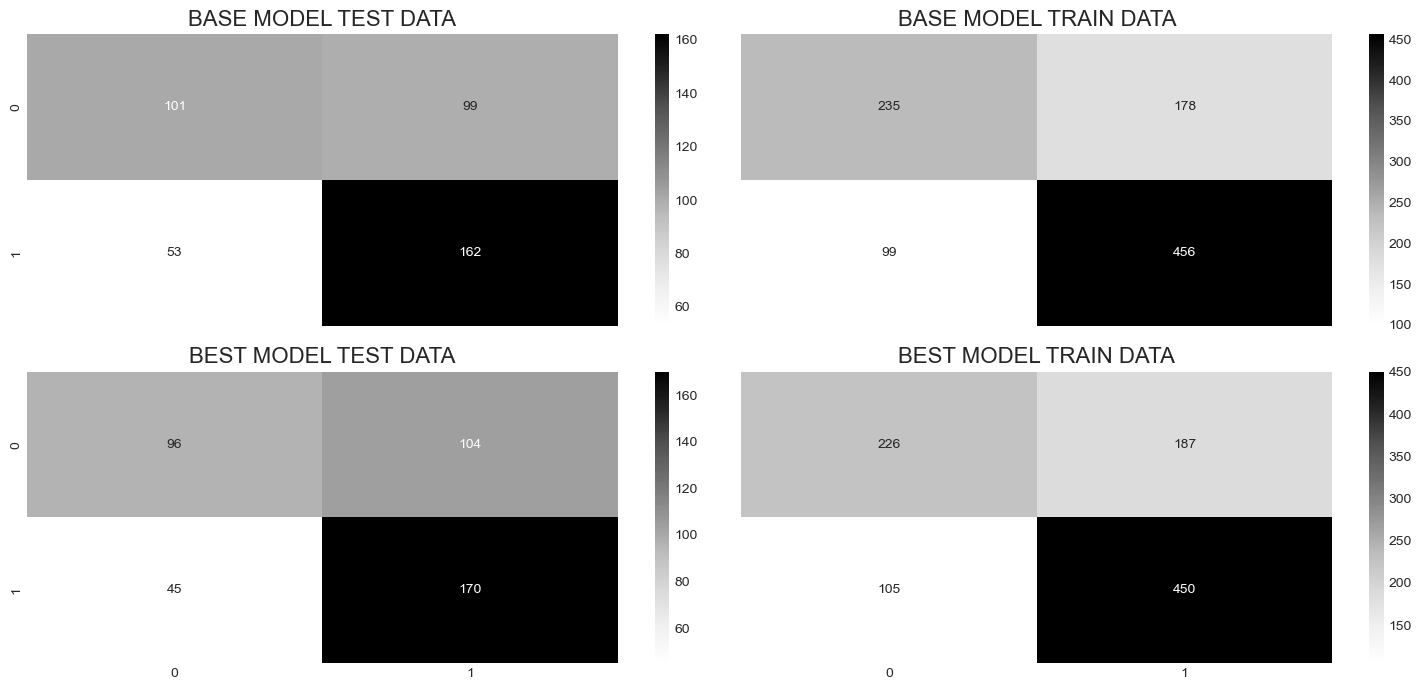

In [137]:
f,a =  plt.subplots(2,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred_base_model_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('BASE MODEL TEST DATA')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_base_model_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('BASE MODEL TRAIN DATA')

plot_2 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred_best_model_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][0]);
a[1][0].set_title('BEST MODEL TEST DATA');

plot_3 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_best_model_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][1]);
a[1][1].set_title('BEST MODEL TRAIN DATA');
plt.tight_layout()


###  ROC_AUC SCORE & CURVE : BASE MODEL

In [138]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

AUC: 0.681


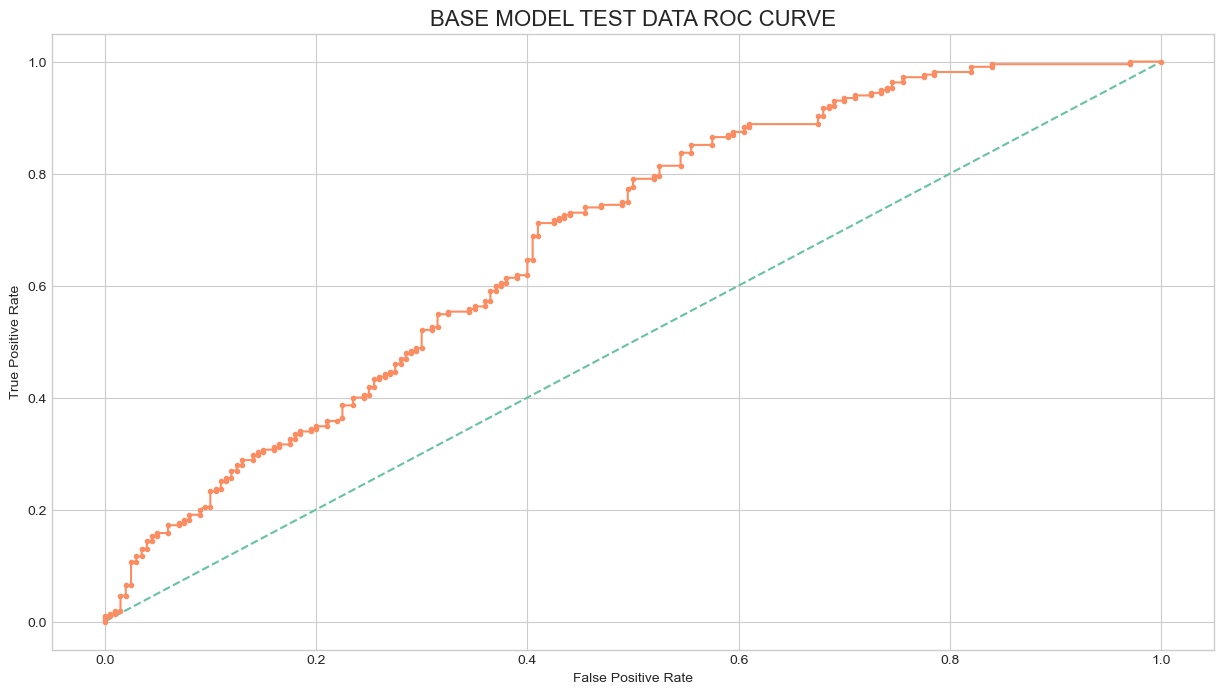

In [139]:
# predict probabilities
probs = y_pred_prob_base_model_test
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BASE MODEL TEST DATA ROC CURVE')
# show the plot
plt.show()

AUC: 0.764


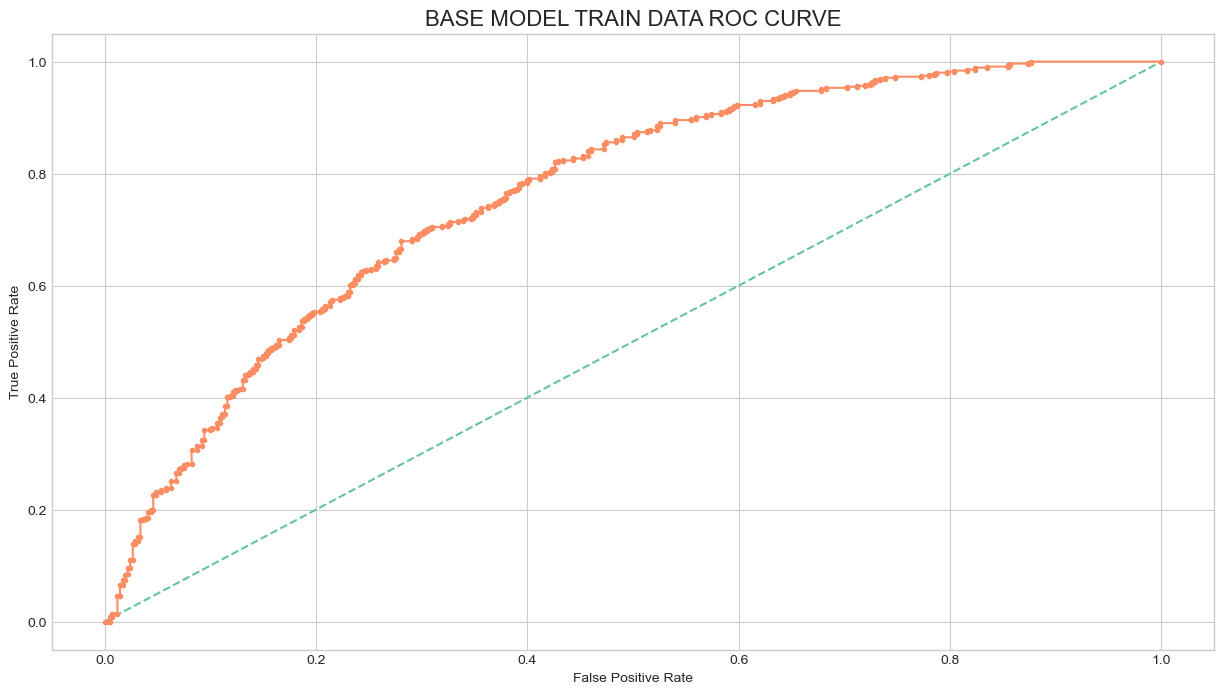

In [140]:
# predict probabilities
probs = y_pred_prob_base_model_train
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BASE MODEL TRAIN DATA ROC CURVE')
# show the plot
plt.show()

### ROC_AUC SCORE & CURVE : BEST MODEL 

AUC: 0.702


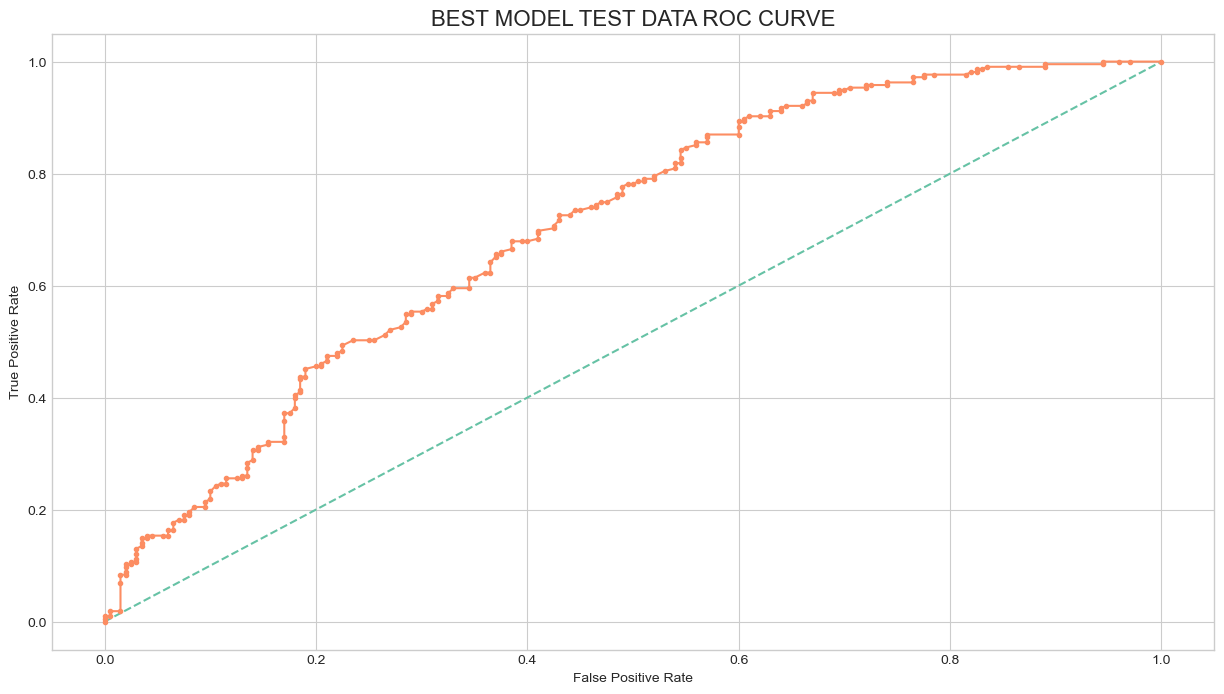

In [141]:
# predict probabilities
probs = y_pred_prob_best_model_test
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BEST MODEL TEST DATA ROC CURVE')
# show the plot
plt.show()

AUC: 0.748


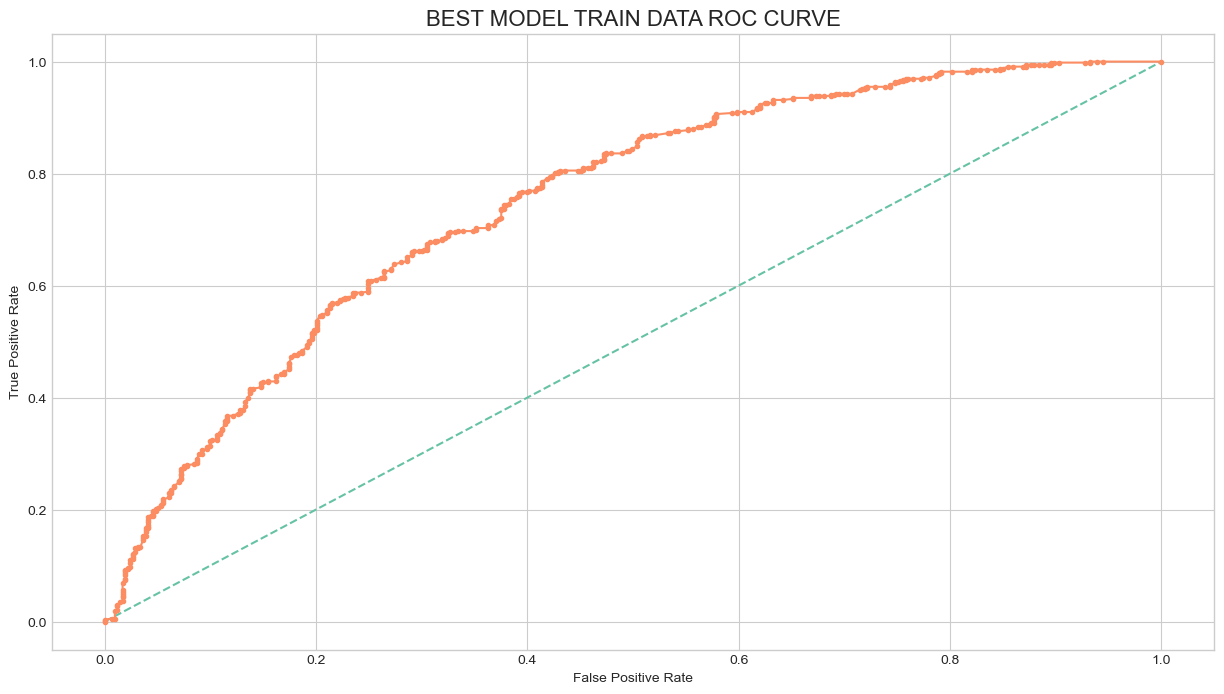

In [142]:
# predict probabilities
probs = y_pred_prob_best_model_train
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BEST MODEL TRAIN DATA ROC CURVE')
# show the plot
plt.show()